In [1]:
import torch
from memflow.phasespace.phasespace import PhaseSpace
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from  memflow.phasespace.utils import *
torch.set_default_dtype(torch.double)

In [2]:
E_CM = 13000
phasespace = PhaseSpace(E_CM, [21,21], [21,6,-6,25], final_masses=torch.Tensor([125.25, 172.5, 172.5, 0.001]))

Phasespace class: masses: tensor([1.2525e+02, 1.7250e+02, 1.7250e+02, 1.0000e-03])


In [3]:
points_out, momenta, weight, x1, x2 = phasespace.generate_random_phase_space_points(100000)

print(momenta.shape)

torch.Size([100000, 6, 4])


Text(0.5, 0, 'Pz')

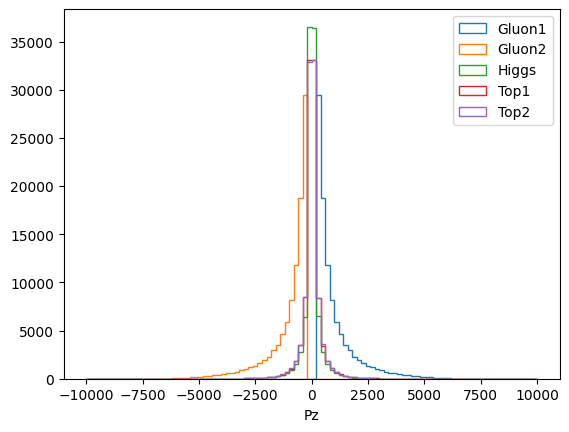

In [4]:
plt.hist(momenta[:,0,3], bins=100, range=(-1e4,1e4), histtype="step", label="Gluon1")
plt.hist(momenta[:,1,3], bins=100, range=(-1e4,1e4), histtype="step", label="Gluon2")
plt.hist(momenta[:,2,3], bins=100, range=(-1e4,1e4), histtype="step", label="Higgs")
plt.hist(momenta[:,3,3], bins=100, range=(-1e4,1e4), histtype="step", label="Top1")
plt.hist(momenta[:,4,3], bins=100, range=(-1e4,1e4), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Pz")

Text(0.5, 0, 'Px')

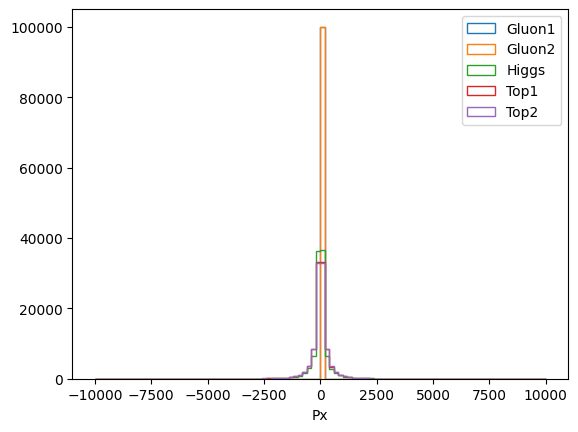

In [5]:
plt.hist(momenta[:,0,1], bins=100, range=(-1e4,1e4), histtype="step", label="Gluon1")
plt.hist(momenta[:,1,1], bins=100, range=(-1e4,1e4), histtype="step", label="Gluon2")
plt.hist(momenta[:,2,1], bins=100, range=(-1e4,1e4), histtype="step", label="Higgs")
plt.hist(momenta[:,3,1], bins=100, range=(-1e4,1e4), histtype="step", label="Top1")
plt.hist(momenta[:,4,1], bins=100, range=(-1e4,1e4), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Px")

Text(0.5, 0, 'E')

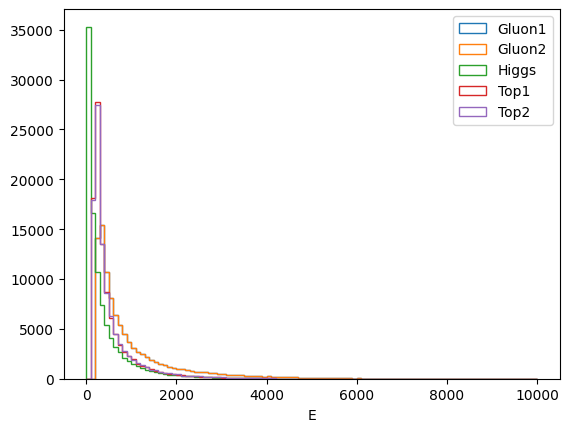

In [6]:
plt.hist(momenta[:,0,0], bins=100, range=(0,1e4), histtype="step", label="Gluon1")
plt.hist(momenta[:,1,0], bins=100, range=(0,1e4), histtype="step", label="Gluon2")
plt.hist(momenta[:,2,0], bins=100, range=(0,1e4), histtype="step", label="Higgs")
plt.hist(momenta[:,3,0], bins=100, range=(0,1e4), histtype="step", label="Top1")
plt.hist(momenta[:,4,0], bins=100, range=(0,1e4), histtype="step", label="Top2")
plt.legend()
plt.xlabel("E")

In [7]:
x1

tensor([0.0074, 0.0057, 0.0148,  ..., 0.3920, 0.4624, 0.0169])

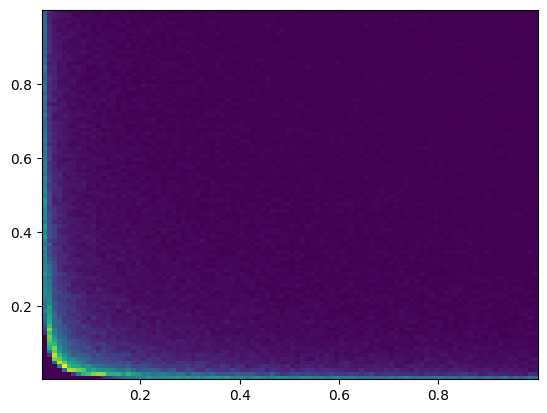

In [8]:
plt.hist2d(x1.numpy(), x2.numpy(), bins=100);

In [9]:
momenta

tensor([[[  283.6505,     0.0000,     0.0000,   283.6505],
         [  283.6505,     0.0000,     0.0000,  -283.6505],
         [   34.3243,   -25.6975,    20.7457,    -9.3494],
         [  200.1030,    -7.6254,    29.8327,    96.6272],
         [  195.5657,    50.4698,     2.0292,   -77.0608],
         [  137.3081,   -17.1469,   -52.6076,   -10.2170]],

        [[  267.6839,     0.0000,     0.0000,   267.6839],
         [  267.6839,     0.0000,     0.0000,  -267.6839],
         [   29.8971,    -3.4783,   -16.9979,   -24.3476],
         [  184.7774,   -63.2750,   -18.0989,     7.4266],
         [  191.4256,    82.2339,    10.7223,     3.1802],
         [  129.2677,   -15.4806,    24.3745,    13.7407]],

        [[  291.3480,     0.0000,     0.0000,   291.3480],
         [  291.3480,     0.0000,     0.0000,  -291.3480],
         [   23.6041,   -14.4672,    -9.8813,   -15.8182],
         [  189.0285,   -38.7893,   -26.2302,    61.5051],
         [  184.8702,   -18.4562,    -2.2401,    63.

# Go back from momenta and x1 x2 to phasespace points

In [4]:
PS, prob = phasespace.get_ps_from_momenta(momenta[:,2:], x1, x2)  #get from partons and 
print(PS.shape)
print(points_out.shape)

torch.Size([100000, 10])
torch.Size([100000, 10])


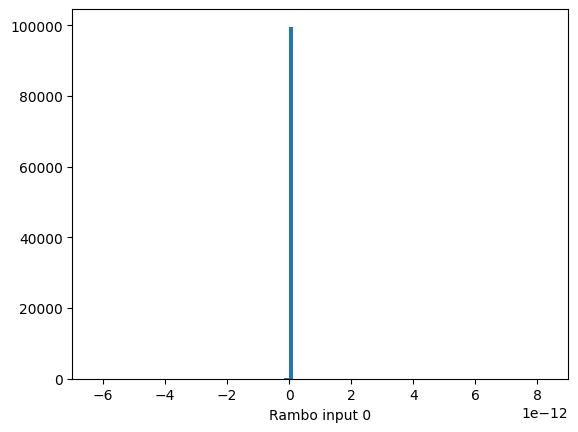

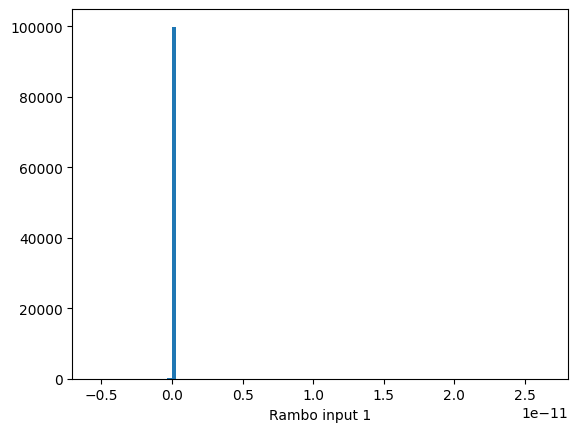

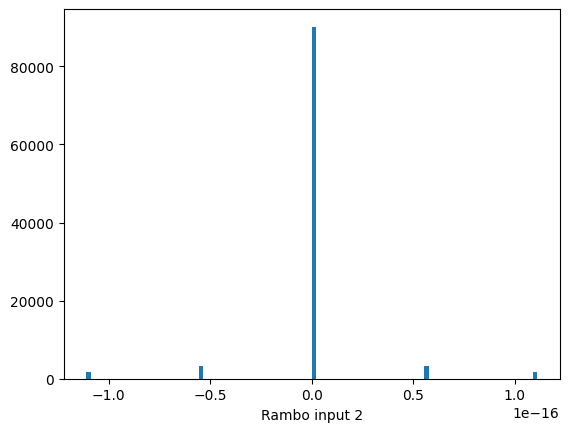

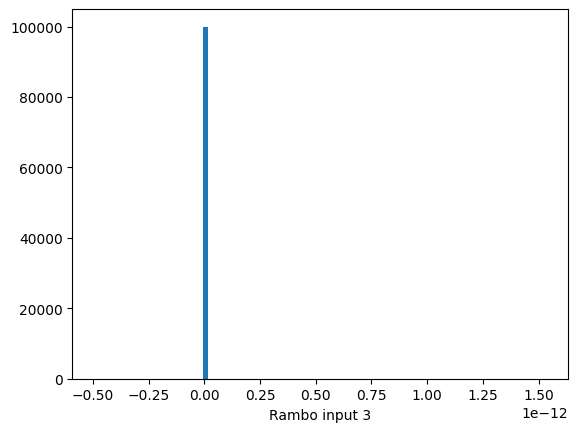

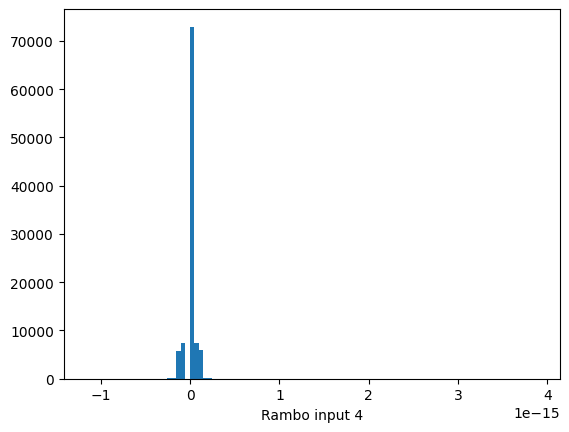

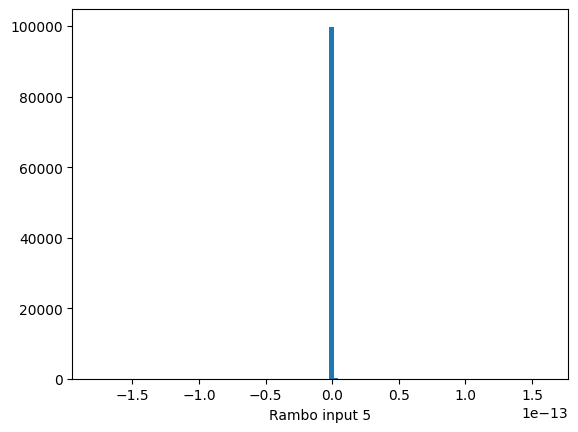

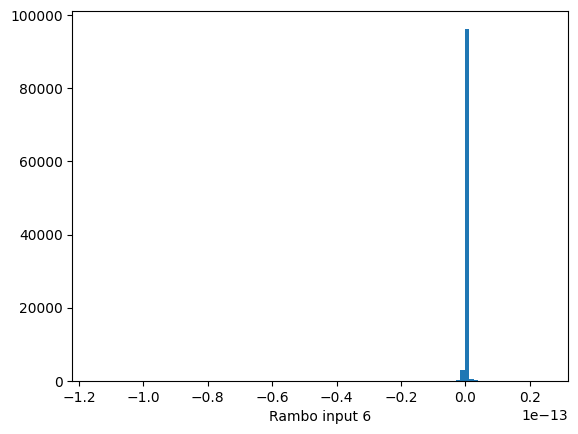

In [5]:
for i in range(7):
    plt.figure()
    plt.hist((PS[:,i] - points_out[:,i]).flatten().numpy(), bins=100);
    plt.xlabel(f"Rambo input {i}")

# Compare PS --> momenta --> PS

tensor([ 7.9479,  7.6644, -0.4334,  ..., -2.8624, -2.9744,  7.3678])
tensor([-1.5703,  7.3953, -2.9266,  ..., -0.4651, -0.7228, -2.0735])
tensor([-1.9843, -0.2889,  6.7931,  ...,  7.4659, -1.2479,  7.8622])
tensor([-3.0442, -0.2459,  8.2893,  ...,  9.4014,  8.3426, -2.6807])
tensor([ 9.2147, -2.4095,  8.8143,  ...,  7.9758,  7.1338,  7.8987])
tensor([ 7.0184,  9.1341, -2.0698,  ..., -1.7132,  6.5338, -2.1985])


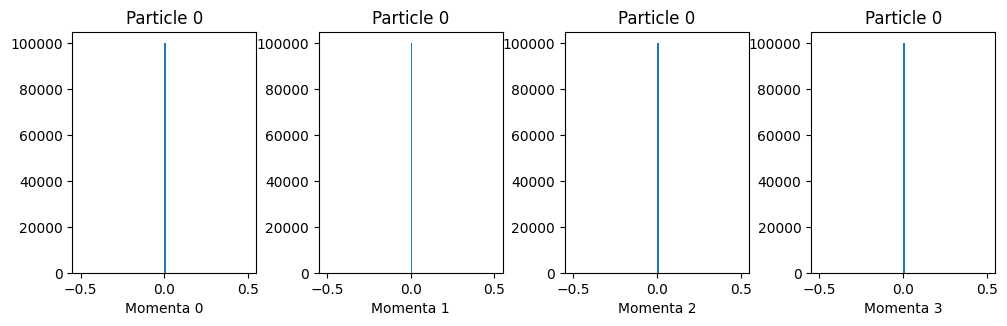

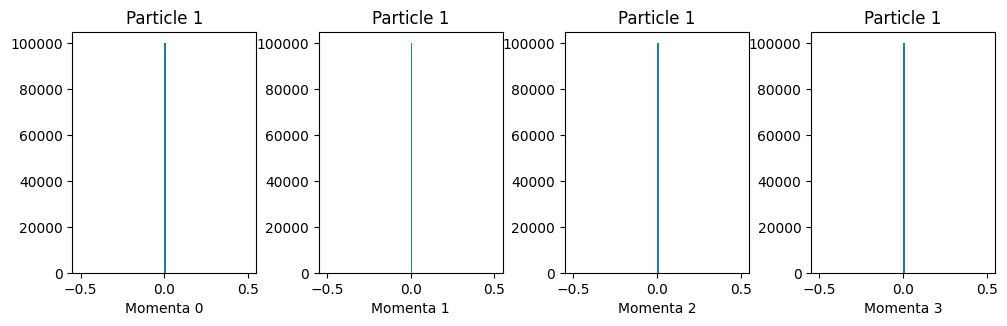

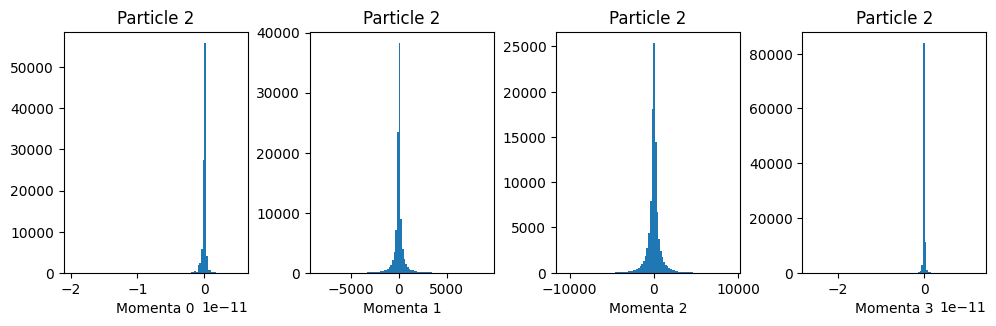

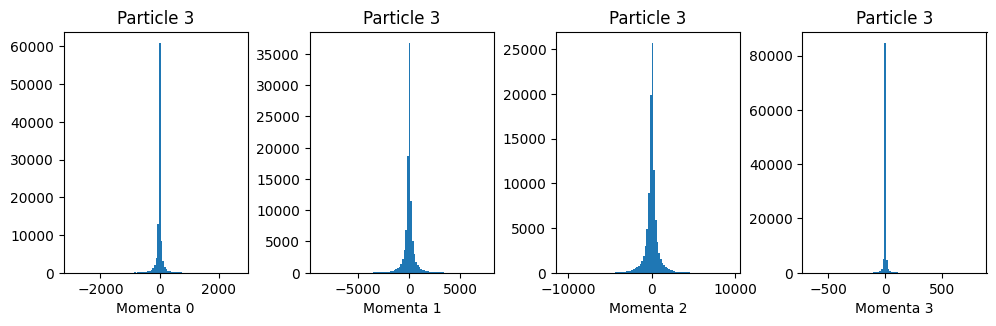

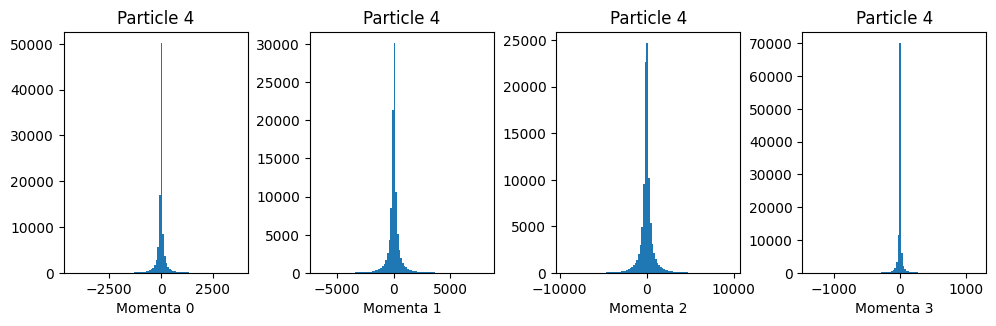

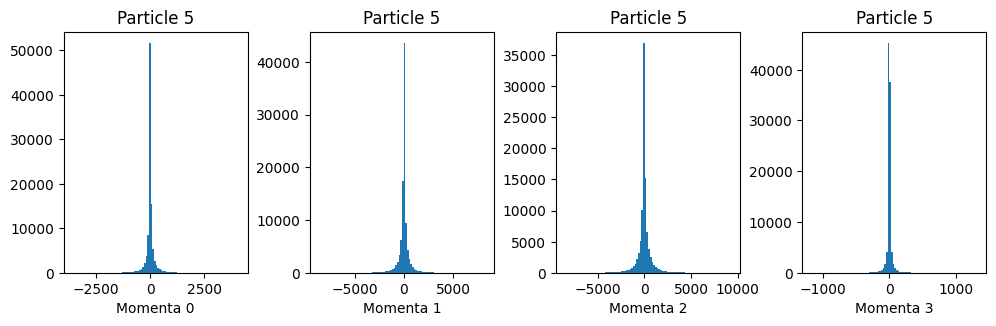

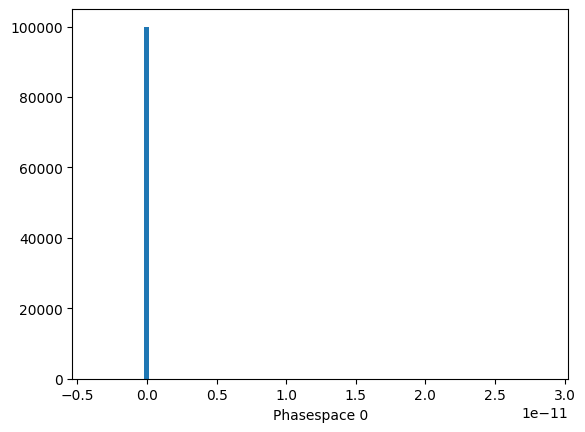

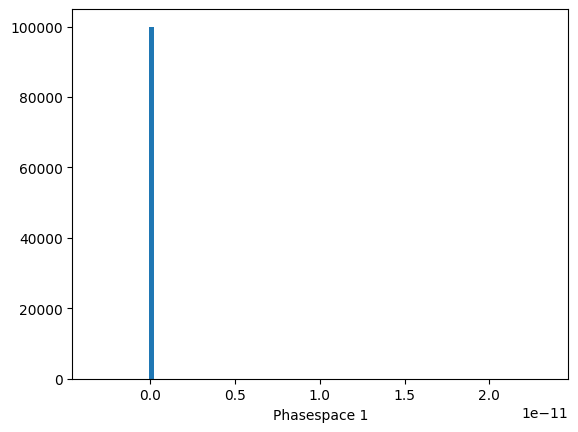

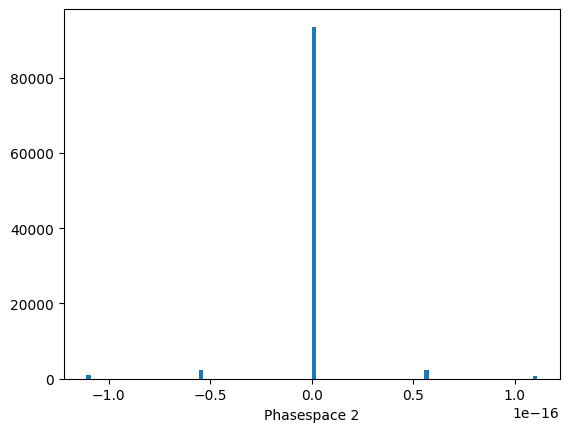

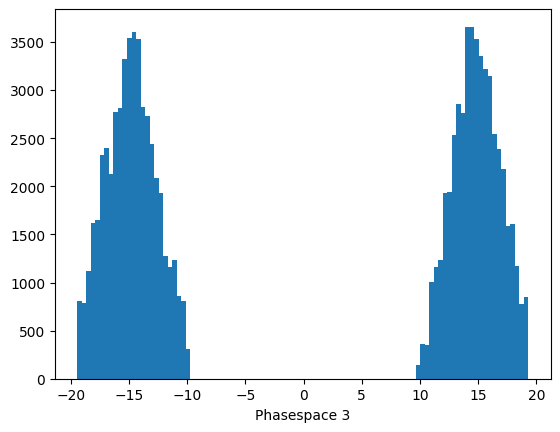

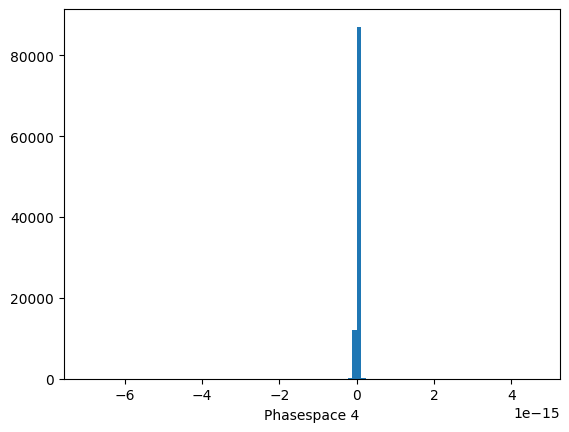

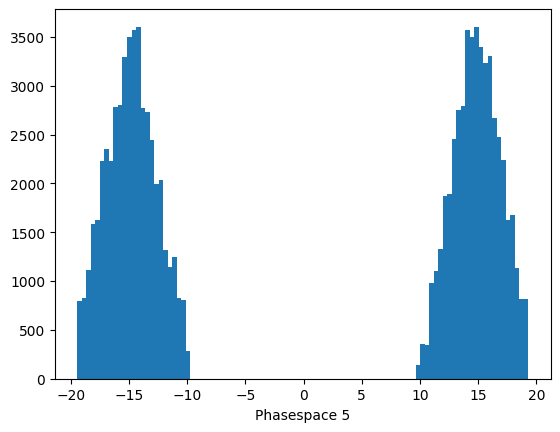

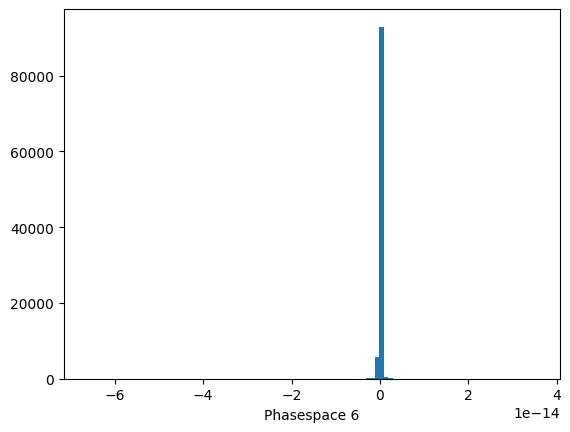

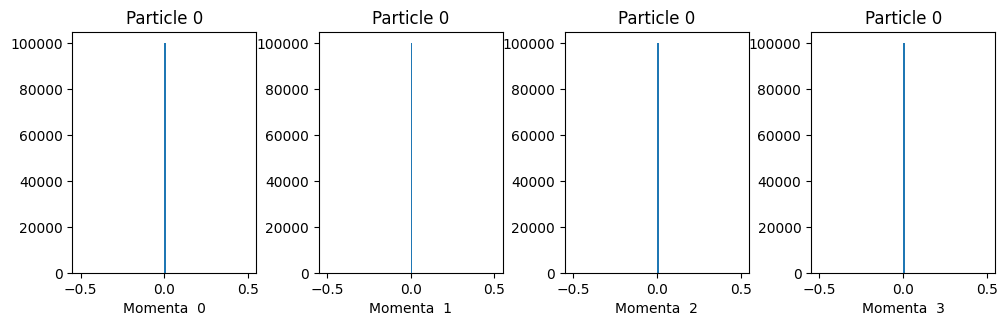

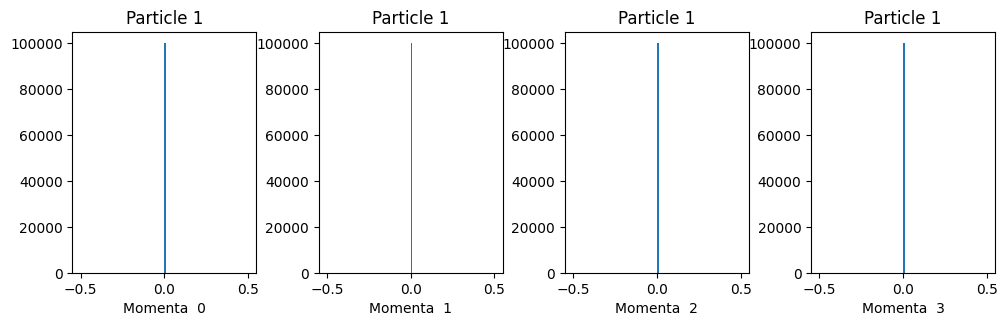

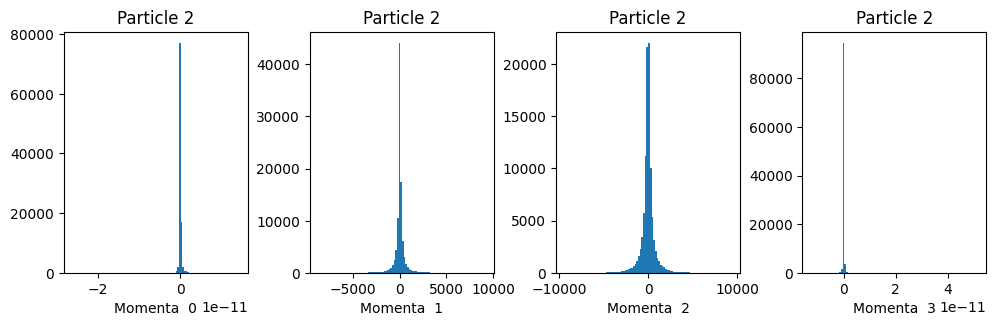

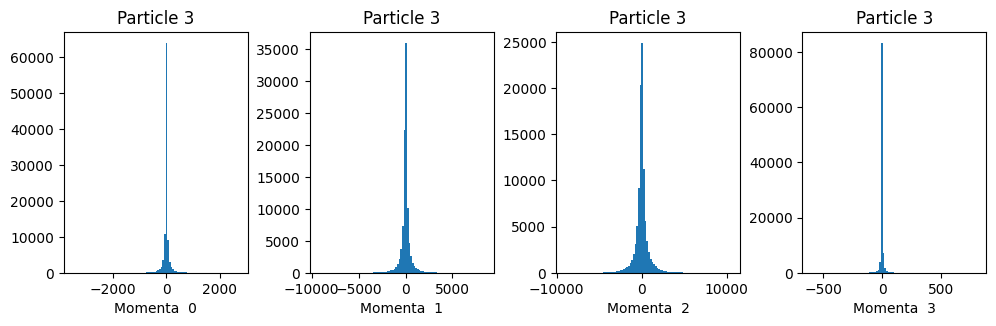

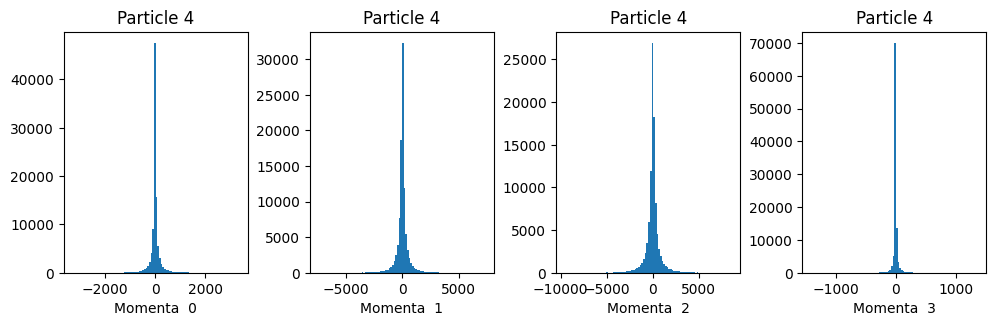

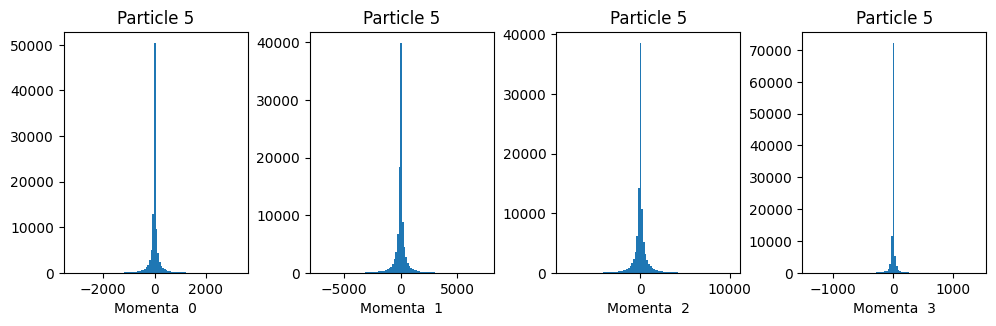

In [6]:
# start from MOMENTA
PS1, det = phasespace.get_ps_from_momenta(momenta[:,2:], x1, x2)
momenta2, weight, x1p, x2p = phasespace.get_momenta_from_ps(PS1)
PS2, det = phasespace.get_ps_from_momenta(momenta2[:,2:], x1p, x2p)
momenta3, weight, x1pp, x2pp = phasespace.get_momenta_from_ps(PS2)

particles = 6
for j in range(particles):
    f, axs = plt.subplots(1, 4, figsize=(10,3))
    plt.tight_layout()
    for i in range(4):
        ax = axs[i]
        ax.hist(momenta[:,j,i].numpy() - momenta2[:,j,i].numpy(), bins=100)
        ax.set_xlabel(f"Momenta {i}")
        ax.set_title(f"Particle {j}")

plt.figure()
for i in range(7):
    plt.hist((PS2-PS1)[:,i].numpy(), bins=100)
    plt.xlabel(f"Phasespace {i}")
    plt.show()

for j in range(particles):
    f, axs = plt.subplots(1, 4, figsize=(10,3))
    plt.tight_layout()
    for i in range(4):
        ax = axs[i]
        ax.hist(momenta3[:,j,i].numpy() - momenta2[:,j,i].numpy(), bins=100)
        ax.set_xlabel(f"Momenta  {i}")
        ax.set_title(f"Particle {j}")

In [ ]:
plt.hist(PS2.flatten().numpy(), bins=100, histtype="step");
plt.hist(PS1.flatten().numpy(), bins=100, histtype="step");

In [ ]:
event_with_large_PS_diff = torch.any((PS2-PS1) > .4, axis=-1)

In [ ]:
bad_events = momenta[event_with_large_PS_diff]
good_events = momenta[~event_with_large_PS_diff]
PS_bad = PS2[event_with_large_PS_diff]

Text(0.5, 0, 'Energy')

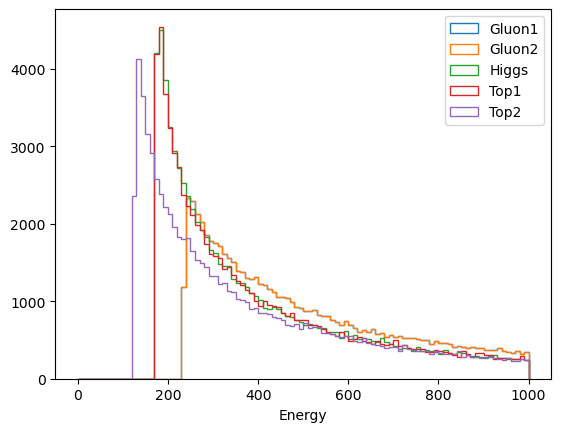

In [160]:
plt.hist(good_events[:,0,0], bins=100, range=(0,1e3), histtype="step", label="Gluon1")
plt.hist(good_events[:,1,0], bins=100, range=(0,1e3), histtype="step", label="Gluon2")
plt.hist(good_events[:,2,0], bins=100, range=(0,1e3), histtype="step", label="Higgs")
plt.hist(good_events[:,3,0], bins=100, range=(0,1e3), histtype="step", label="Top1")
plt.hist(good_events[:,4,0], bins=100, range=(0,1e3), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Energy")

Text(0.5, 0, 'Energy')

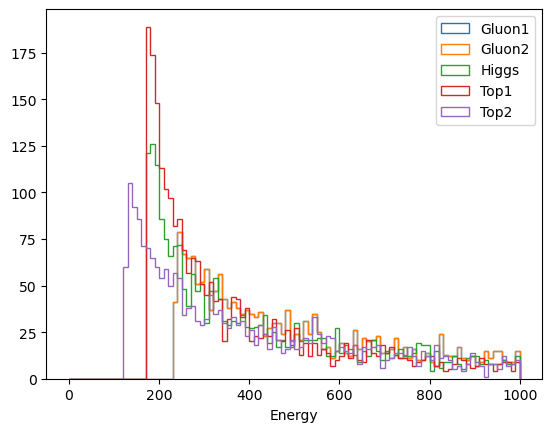

In [161]:
plt.hist(bad_events[:,0,0], bins=100, range=(0,1e3), histtype="step", label="Gluon1")
plt.hist(bad_events[:,1,0], bins=100, range=(0,1e3), histtype="step", label="Gluon2")
plt.hist(bad_events[:,2,0], bins=100, range=(0,1e3), histtype="step", label="Higgs")
plt.hist(bad_events[:,3,0], bins=100, range=(0,1e3), histtype="step", label="Top1")
plt.hist(bad_events[:,4,0], bins=100, range=(0,1e3), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Energy")

Text(0.5, 0, 'Px')

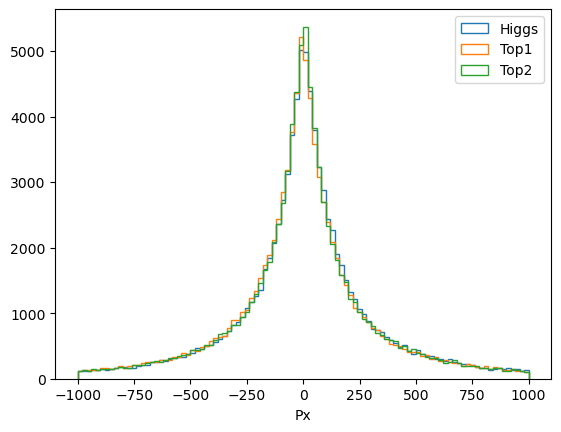

In [162]:
plt.hist(good_events[:,2,1], bins=100, range=(-1e3,1e3), histtype="step", label="Higgs")
plt.hist(good_events[:,3,1], bins=100, range=(-1e3,1e3), histtype="step", label="Top1")
plt.hist(good_events[:,4,1], bins=100, range=(-1e3,1e3), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Px")

Text(0.5, 0, 'Px')

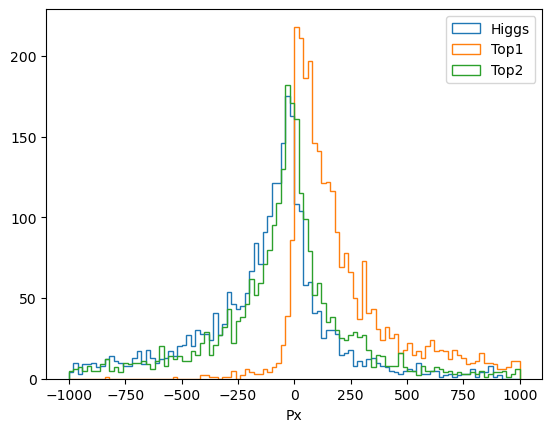

In [163]:
plt.hist(bad_events[:,2,1], bins=100, range=(-1e3,1e3), histtype="step", label="Higgs")
plt.hist(bad_events[:,3,1], bins=100, range=(-1e3,1e3), histtype="step", label="Top1")
plt.hist(bad_events[:,4,1], bins=100, range=(-1e3,1e3), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Px")

Text(0.5, 0, 'Py')

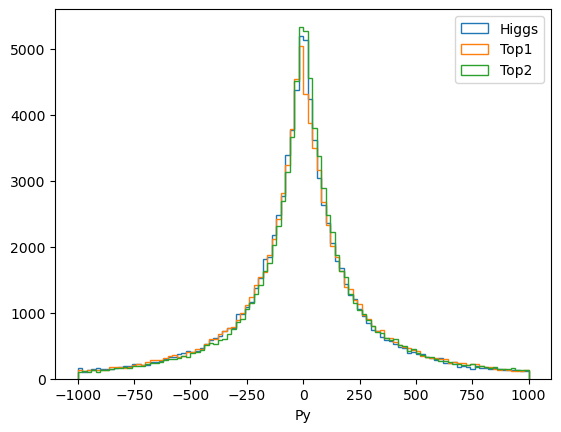

In [164]:
plt.hist(good_events[:,2,2], bins=100, range=(-1e3,1e3), histtype="step", label="Higgs")
plt.hist(good_events[:,3,2], bins=100, range=(-1e3,1e3), histtype="step", label="Top1")
plt.hist(good_events[:,4,2], bins=100, range=(-1e3,1e3), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Py")

Text(0.5, 0, 'Py')

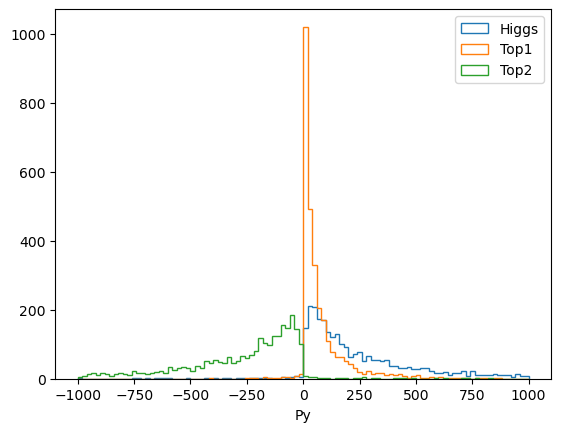

In [165]:
plt.hist(bad_events[:,2,2], bins=100, range=(-1e3,1e3), histtype="step", label="Higgs")
plt.hist(bad_events[:,3,2], bins=100, range=(-1e3,1e3), histtype="step", label="Top1")
plt.hist(bad_events[:,4,2], bins=100, range=(-1e3,1e3), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Py")

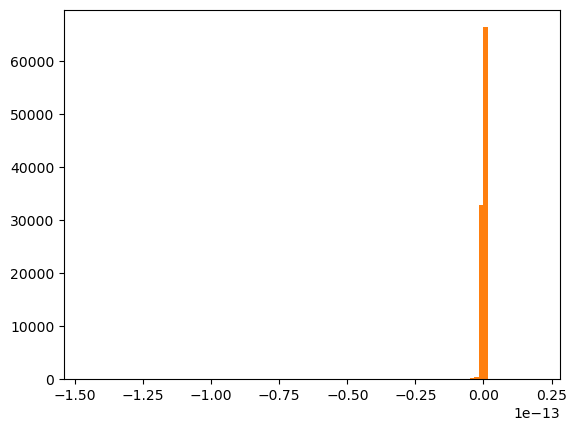

In [166]:
plt.hist((x1- x1p).numpy(), bins=100);
plt.hist((x2- x2p).numpy(), bins=100);

Text(0.5, 0, 'PZ')

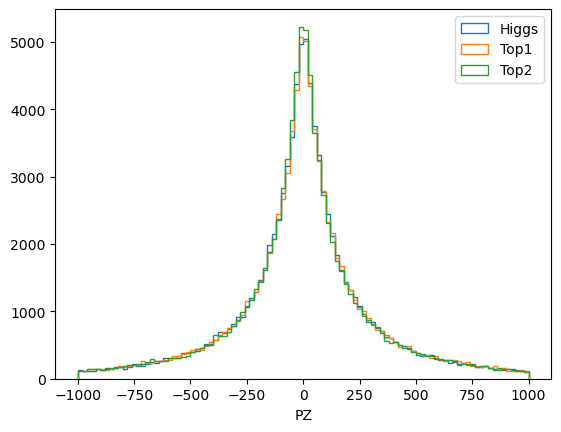

In [167]:
plt.hist(good_events[:,2,3], bins=100, range=(-1e3,1e3), histtype="step", label="Higgs")
plt.hist(good_events[:,3,3], bins=100, range=(-1e3,1e3), histtype="step", label="Top1")
plt.hist(good_events[:,4,3], bins=100, range=(-1e3,1e3), histtype="step", label="Top2")
plt.legend()
plt.xlabel("PZ")

Text(0.5, 0, 'Pz')

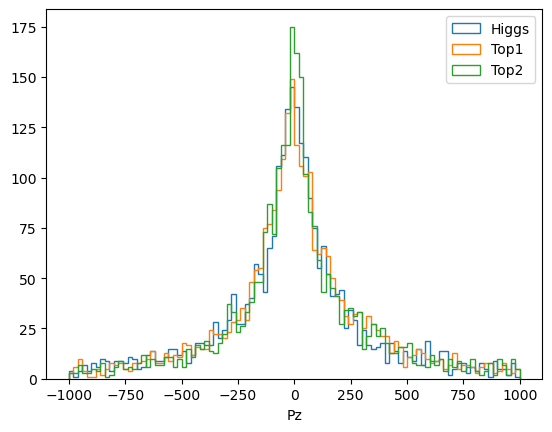

In [168]:
plt.hist(bad_events[:,2,3], bins=100, range=(-1e3,1e3), histtype="step", label="Higgs")
plt.hist(bad_events[:,3,3], bins=100, range=(-1e3,1e3), histtype="step", label="Top1")
plt.hist(bad_events[:,4,3], bins=100, range=(-1e3,1e3), histtype="step", label="Top2")
plt.legend()
plt.xlabel("Pz")

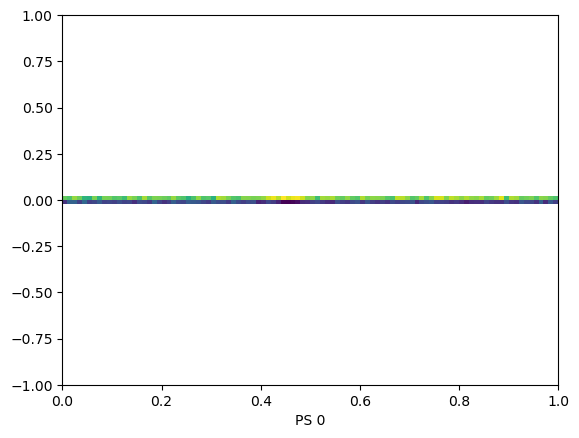

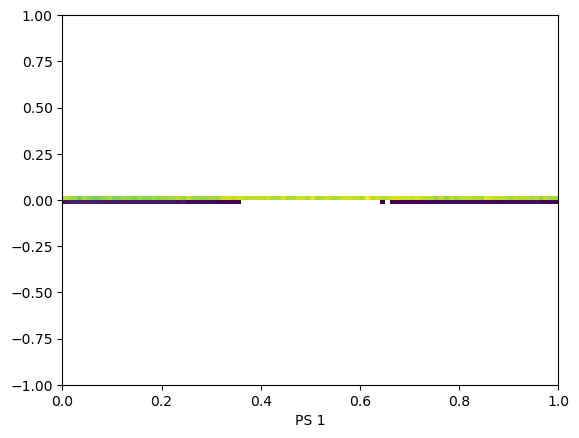

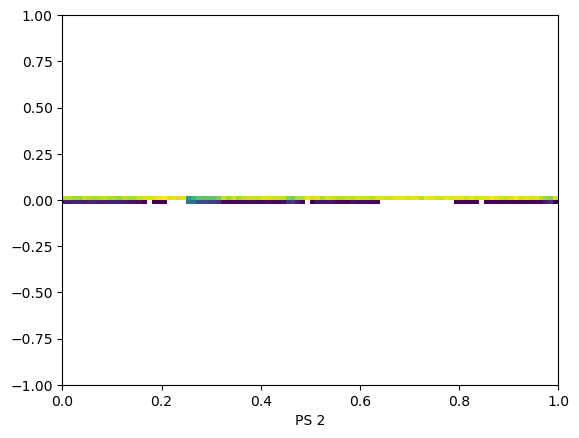

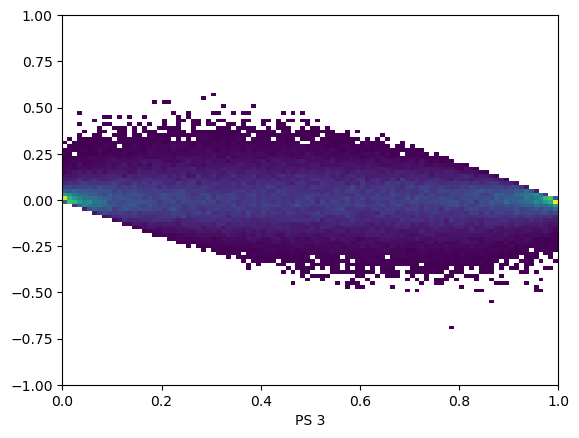

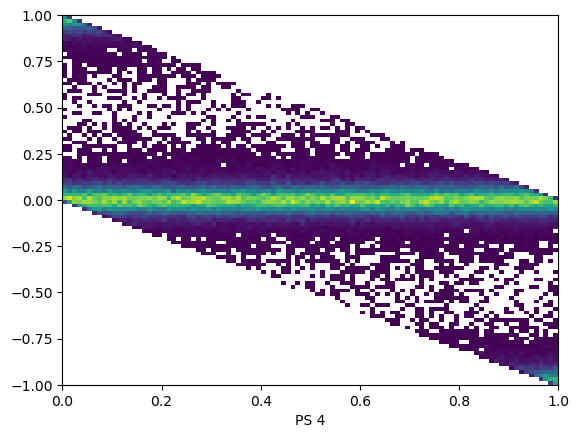

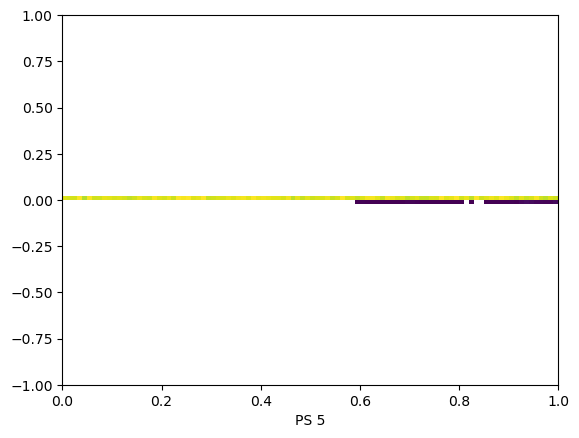

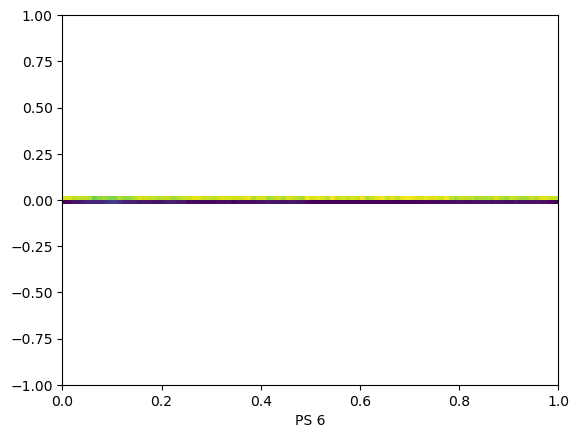

In [169]:
for i in range(7):
    plt.figure()
    plt.hist2d( PS1[:,i].numpy(), (PS2-PS1)[:,i].numpy(),
          bins=100,range=((0,1), (-1,1)), cmin=1);
    plt.xlabel(f"PS {i}")

In [170]:
bad_events

tensor([[[ 7.9125e+02,  0.0000e+00,  0.0000e+00,  7.9125e+02],
         [ 7.9125e+02,  0.0000e+00,  0.0000e+00, -7.9125e+02],
         [ 5.2681e+02, -3.6069e+02,  2.8517e+02,  1.9067e+02],
         [ 5.6015e+02,  3.6752e+02,  1.6784e+02, -3.4753e+02],
         [ 4.9554e+02, -6.8316e+00, -4.5301e+02,  1.5685e+02]],

        [[ 3.0263e+02,  0.0000e+00,  0.0000e+00,  3.0263e+02],
         [ 3.0263e+02,  0.0000e+00,  0.0000e+00, -3.0263e+02],
         [ 2.2166e+02,  1.1004e+02,  4.6908e+01,  7.1182e+01],
         [ 1.8626e+02,  3.4551e+01,  5.3808e-01, -6.1177e+01],
         [ 1.9735e+02, -1.4459e+02, -4.7446e+01, -1.0004e+01]],

        [[ 3.4910e+03,  0.0000e+00,  0.0000e+00,  3.4910e+03],
         [ 3.4910e+03,  0.0000e+00,  0.0000e+00, -3.4910e+03],
         [ 3.4609e+03, -3.7458e+02,  2.2147e+02,  3.4291e+03],
         [ 2.8976e+03,  3.0071e+02,  2.8603e+01, -2.8767e+03],
         [ 6.2359e+02,  7.3862e+01, -2.5007e+02, -5.5244e+02]],

        ...,

        [[ 1.5041e+03,  0.0000e+00,

In [171]:
(PS2-PS1)[:,i].numpy()

array([ 5.55111512e-17,  0.00000000e+00,  0.00000000e+00, ...,
        0.00000000e+00, -1.11022302e-16,  0.00000000e+00])

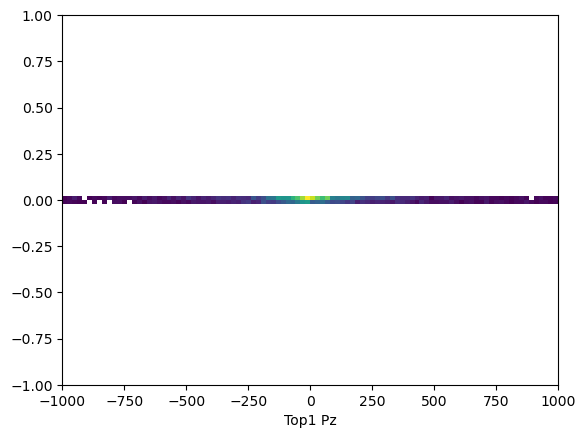

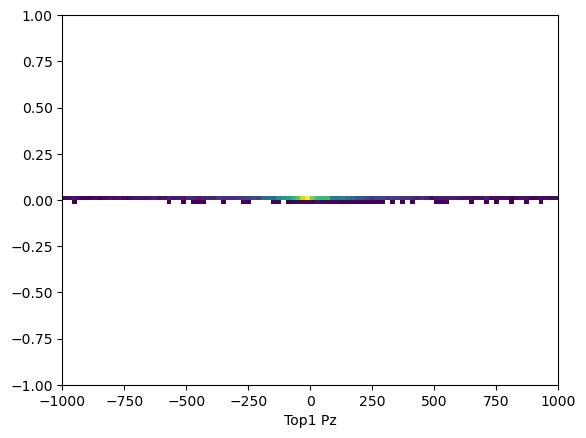

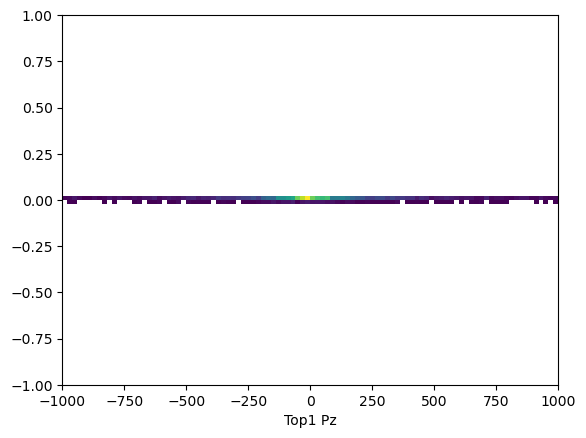

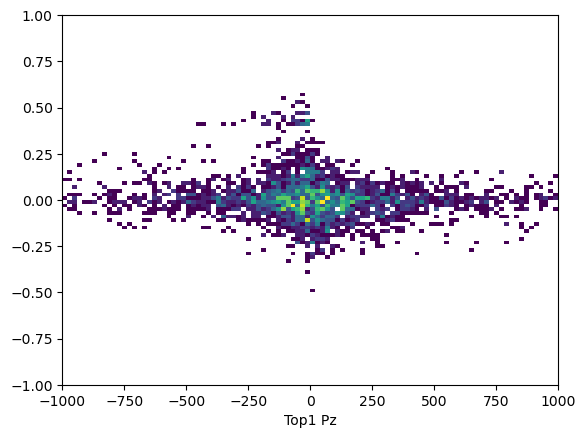

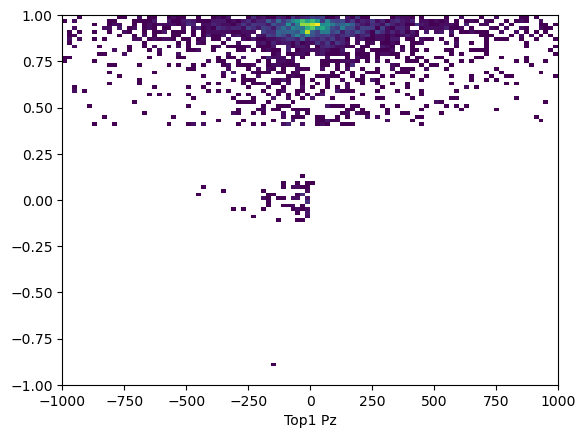

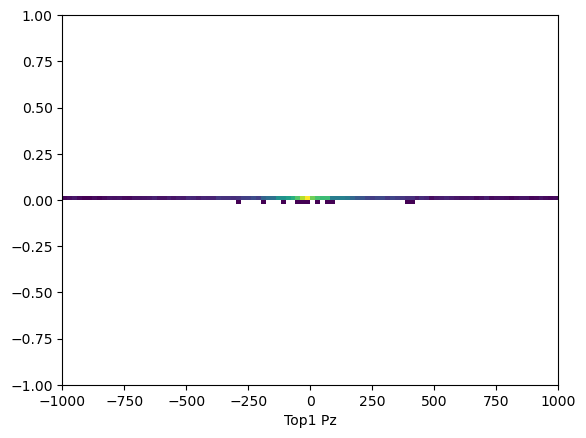

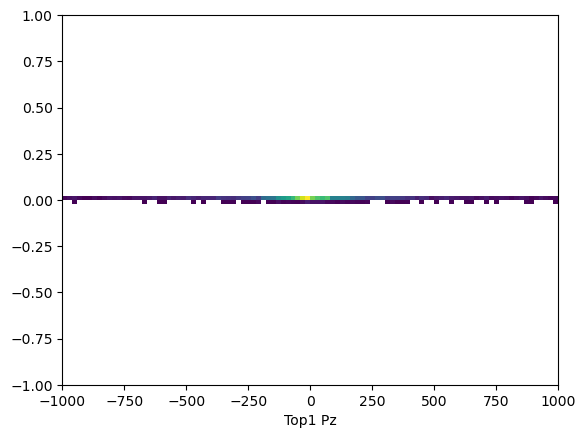

In [172]:
for i in range(7):
    plt.figure()
    plt.hist2d( bad_events[:,3,3].numpy(), (PS2[event_with_large_PS_diff]-PS1[event_with_large_PS_diff])[:,i].numpy(),
          bins=(100,100),range=((-1e3, 1e3), (-1,1)), cmin=1);
    plt.xlabel(f"Top1 Pz")

# Compare momenta --> ps --> momenta

In [31]:
momenta

tensor([[[ 2610.2864,     0.0000,     0.0000,  2610.2864],
         [ 2610.2864,     0.0000,     0.0000, -2610.2864],
         [ 1372.7634,  -653.7678,   689.0547,   983.1495],
         [ 2124.9787,  1233.4663,   837.6484, -1504.2221],
         [ 1722.8307,  -579.6985, -1526.7031,   521.0726]],

        [[  292.4551,     0.0000,     0.0000,   292.4551],
         [  292.4551,     0.0000,     0.0000,  -292.4551],
         [  145.1487,    16.9599,   -29.4954,    64.9843],
         [  233.3491,  -124.5106,    10.4385,   -95.3084],
         [  206.4125,   107.5507,    19.0570,    30.3240]],

        [[ 2674.2024,     0.0000,     0.0000,  2674.2024],
         [ 2674.2024,     0.0000,     0.0000, -2674.2024],
         [ 2482.6948,  1492.4897,  1134.3606, -1622.8944],
         [ 1210.3891, -1112.4768,   -52.5995,   441.4910],
         [ 1655.3209,  -380.0129, -1081.7612,  1181.4035]],

        ...,

        [[  397.2825,     0.0000,     0.0000,   397.2825],
         [  397.2825,     0.0000,   

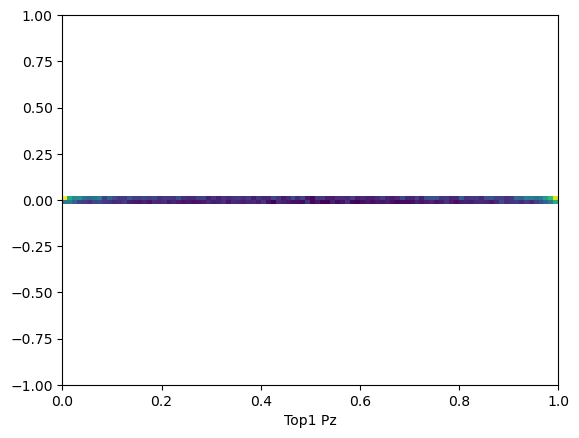

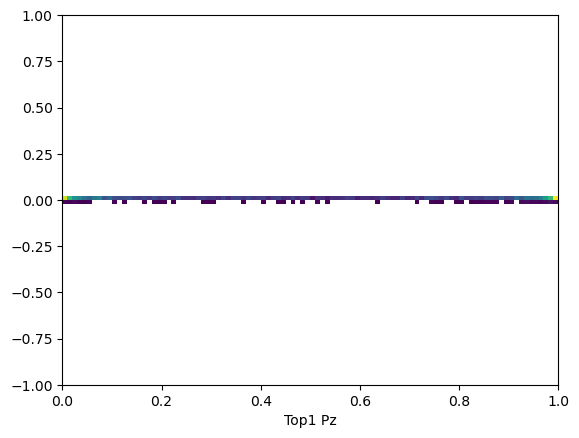

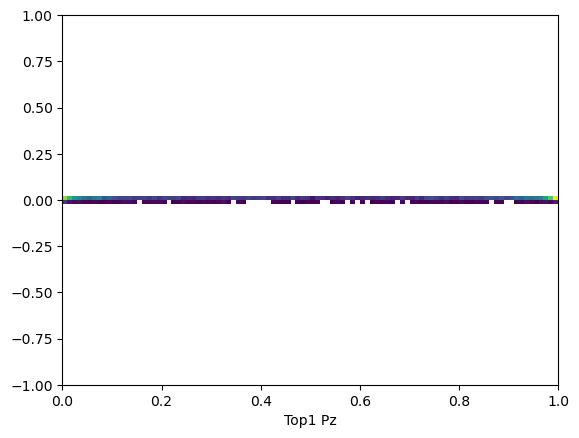

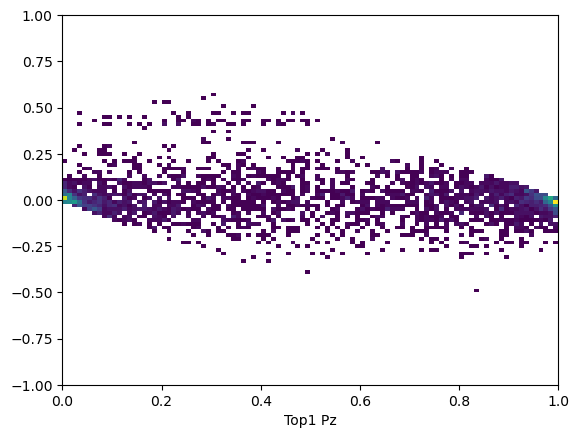

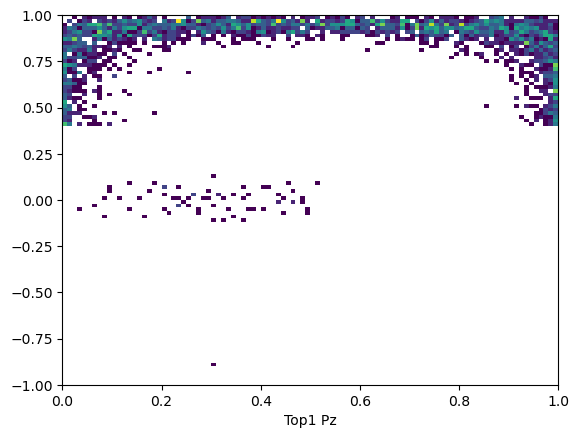

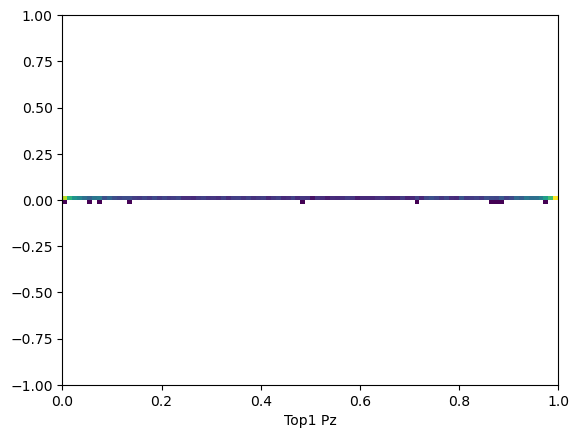

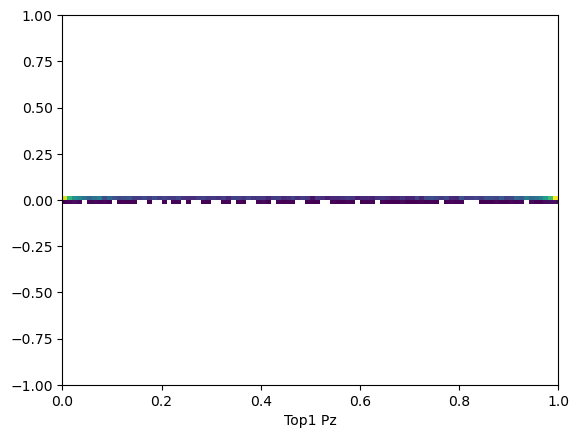

In [176]:
for i in range(7):
    plt.figure()
    plt.hist2d( PS1[event_with_large_PS_diff][:,3].numpy(), (PS2[event_with_large_PS_diff]-PS1[event_with_large_PS_diff])[:,i].numpy(),
          bins=(100,100),range=((0,1), (-1,1)), cmin=1);
    plt.xlabel(f"Top1 Pz")

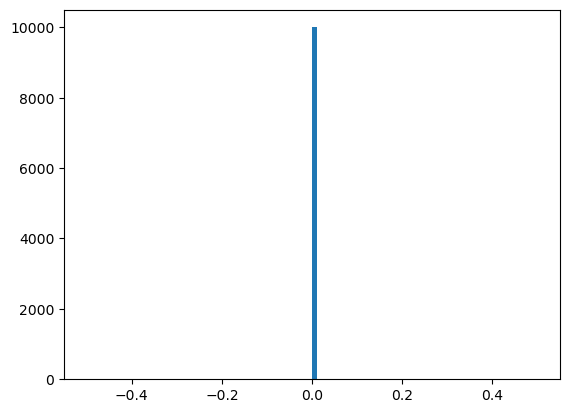

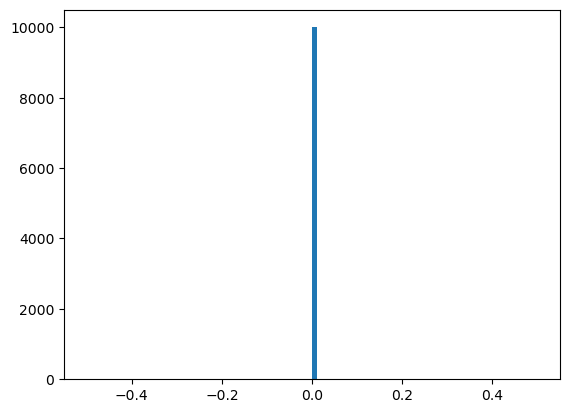

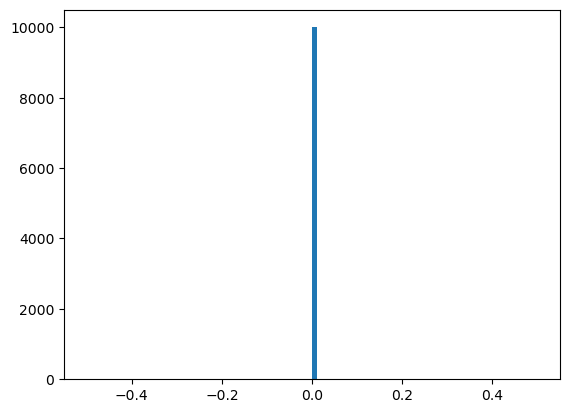

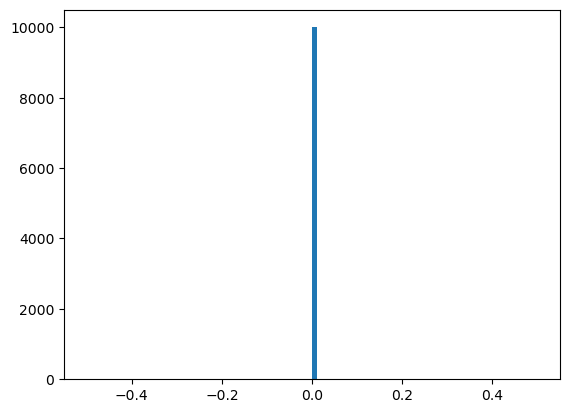

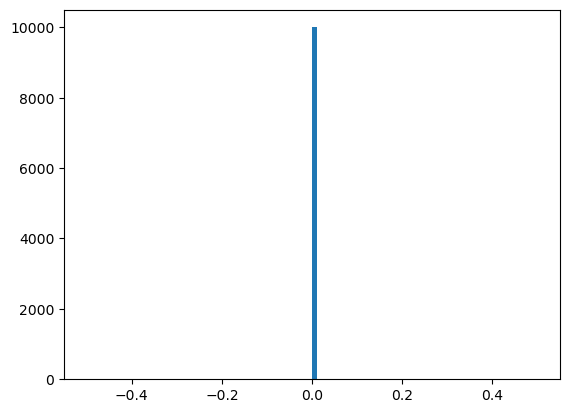

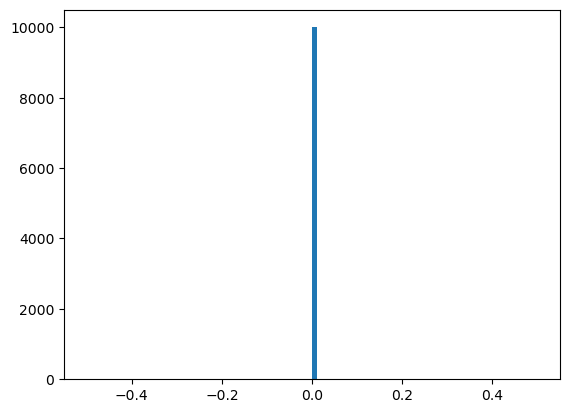

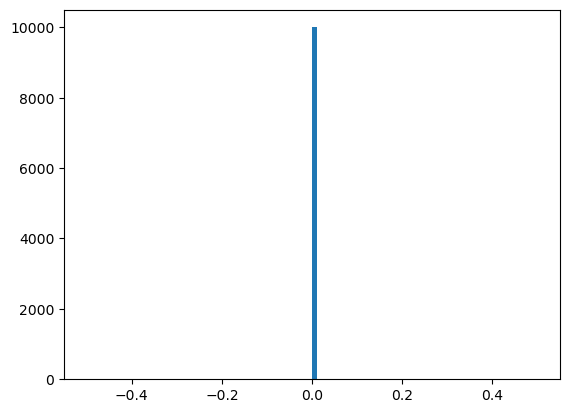

In [35]:
PS1, det = phasespace.get_ps_from_momenta(momenta[:,2:], x1, x2)

particle = 0

for i in range(7):
    plt.hist(PS1[:,i].numpy() - PS[:,i].numpy(), bins=100)
    plt.show()

In [60]:
r

tensor([[0.0734, 0.0128, 0.0174,  ..., 0.7399, 0.0262, 0.0436],
        [0.7153, 0.9773, 0.7909,  ..., 0.4436, 0.4514, 0.3812],
        [0.9255, 0.4108, 0.2456,  ..., 0.8408, 0.6334, 0.7337],
        ...,
        [0.5718, 0.4071, 0.1568,  ..., 0.9567, 0.7834, 0.5444],
        [0.3047, 0.6267, 0.4960,  ..., 0.2691, 0.6809, 0.6813],
        [0.0893, 0.2457, 0.0416,  ..., 0.5648, 0.9967, 0.2434]])